# **Project 1. Video Game Data Analysis**

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import plotly.express as px

# **1. 데이터 전처리**

**데이터 불러오기**

In [ ]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [ ]:
df.shape

(16598, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


**불필요한 column 삭제**

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

**단위 통일 (sales, years)**

* Sales 단위 통일 (백만단위의 Float 형태로 변환)

In [ ]:
# K가 포함되어 있으면 K를 제거한 뒤 float로 변환하고 1000으로 나누어준다. (M 단위로 통일)
# M이 포함되어 있으면 M을 제거한 뒤 float로 변환하고 값은 유지한다.
# K, M이 표기되어 있지 않으면 float로 변환하고 값은 유지한다.

def convertsales(string):
  if 'K' in string:
    return float(string.replace('K',''))/1000
  elif 'M' in string:
    return float(string.replace('M',''))
  else:
    return float(string)

df['NA_Sales'] = df['NA_Sales'].apply(convertsales)
df['EU_Sales'] = df['EU_Sales'].apply(convertsales)
df['JP_Sales'] = df['JP_Sales'].apply(convertsales)
df['Other_Sales'] = df['Other_Sales'].apply(convertsales)

* Years 단위 통일

In [ ]:
# 100이하 Year 값들은 값에 따라 1900 혹은 2000을 더하여 형태를 네자리수로 통일해준다.
# 0~21 값들은 2000, 그 이상의 값들은 1900을 더해준다. (e.g. 94의 경우 1994년을 지칭하는 것이므로 2000이 아닌 1900을 더해준다.)

def convertyears(year):
  if 0 <= year <= 21:
    return year + 2000
  elif 21 < year < 100: 
    return year + 1900
  else:
    return year

df['Year'] = df['Year'].apply(convertyears)

**결측치 확인**

In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

**결측값 대체 (결측치 가장 많은 Year 처리)**

In [ ]:
# Platform과 Genre의 조합을 그룹으로 지정하여 각 그룹별 year 값들의 median을 구하고 이 값을 Year 결측값들을 처리할 때 사용한다.

def replace_year_na(df, condition_cols, cols):
  s = df.groupby(condition_cols)[cols].transform('median')
  return df.fillna(s.to_dict('series'))

df_refined = replace_year_na(df, ['Platform', 'Genre'], ['Year'])

In [ ]:
df_refined.isnull().sum()

Name            0
Platform        0
Year            0
Genre          50
Publisher      58
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
dtype: int64

**나머지 결측값 Drop**

In [ ]:
# Genre, Publisher 결측값(108개) 은 전체 데이터의 0.07% 미만에 해당되므로 결측값 있는 행들을 제거한다.
df_refined = df_refined.dropna(axis=0)

In [ ]:
df_refined.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

**데이터 타입 변환 (Year -> Integer)**

In [ ]:
df_refined = df_refined.astype({'Year': 'int32'})
df_refined

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


**Total Sales Column 추가**

In [ ]:
df_refined['Total_Sales'] = df_refined['NA_Sales'] + df_refined['EU_Sales'] + df_refined['JP_Sales'] + df_refined['Other_Sales']
df_refined

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


# **2. 데이터 분석**

## **1) 지역별 게임 선호도 분석 (장르, 플랫폼)**

### **1-1) 지역별 장르 선호도**

In [ ]:
df_11 = df_refined.groupby('Genre').sum().reset_index()
df_11

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,6621909,874.52,522.08,157.44,186.42,1740.46
1,Adventure,2562340,105.53,64.00,51.87,16.81,238.21
2,Fighting,1693895,221.53,100.12,87.34,36.20,445.19
3,Misc,3426486,402.48,210.31,105.23,73.94,791.96
4,Platform,1767355,446.44,201.11,130.65,51.53,829.73
5,Puzzle,1156956,123.35,50.72,56.87,12.52,243.46
6,Racing,2490005,357.19,237.09,56.40,77.10,727.78
7,Role-Playing,2972455,319.54,183.57,344.90,56.96,904.97
8,Shooter,2619715,581.91,313.02,38.28,102.65,1035.86
9,Simulation,1727675,182.96,113.17,63.64,31.48,391.25


In [ ]:
df_tidy11 = df_11.melt(id_vars = 'Genre', value_vars = ['NA_Sales', 'EU_Sales','JP_Sales', 'Other_Sales'])
df_tidy11 = df_tidy11.rename(
    columns = {
        'index': 'Genre', 
        'variable': 'Country', 
        'value': 'Sales'
        }
)

df_tidy11['Country'] = df_tidy11['Country'].str.replace("_Sales","")
df_tidy11

,Genre,Country,Sales
0,Action,NA,874.52
1,Adventure,NA,105.53
2,Fighting,NA,221.53
3,Misc,NA,402.48
4,Platform,NA,446.44
5,Puzzle,NA,123.35
6,Racing,NA,357.19
7,Role-Playing,NA,319.54
8,Shooter,NA,581.91
9,Simulation,NA,182.96


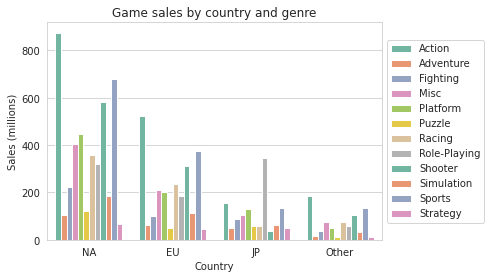

In [ ]:
g11 = sns.barplot(x = "Country", y = "Sales", hue = "Genre",
            data = df_tidy11, palette = "Set2")
g11.legend(loc='center left', bbox_to_anchor=(1, 0.5))
g11.set_title("Game sales by country and genre")
g11.set_ylabel("Sales (millions)");


* **NA:** Action > Sports > Shooter > Platform
* **EU:** Action > Sports > Shooter > Racing
* **JP:** Role-Playing > Action > Sports > Platform
* **Other:** Action > Sports > Shooter > Racing

📌 네 개의 지역 모두 공통적으로 Action과 Sports 장르에 대한 선호도가 높았다. 일본의 경우, 다른 지역과는 다르게 Role-Playing 게임의 출고량이 가장 높게 기록된 반면, 타 지역들에서 세번째로 선호도가 높은 Shooter 장르의 게임은 오히려 가장 낮은 선호도를 보였다.



In [ ]:
df_11

,Genre,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Action,6621909,874.52,522.08,157.44,186.42,1740.46
1,Adventure,2562340,105.53,64.00,51.87,16.81,238.21
2,Fighting,1693895,221.53,100.12,87.34,36.20,445.19
3,Misc,3426486,402.48,210.31,105.23,73.94,791.96
4,Platform,1767355,446.44,201.11,130.65,51.53,829.73
5,Puzzle,1156956,123.35,50.72,56.87,12.52,243.46
6,Racing,2490005,357.19,237.09,56.40,77.10,727.78
7,Role-Playing,2972455,319.54,183.57,344.90,56.96,904.97
8,Shooter,2619715,581.91,313.02,38.28,102.65,1035.86
9,Simulation,1727675,182.96,113.17,63.64,31.48,391.25


✔️ **Two-sample chi-square test 가설 검정**
* **귀무가설:** 지역에 따라서 선호하는 게임 장르가 다르지 않을 것이다 (각 지역 게임 판매량과 게임 장르는 연관이 없다).
* **대립가설:** 지역에 따라 선호하는 게임 장르가 다를 것이다 (각 지역 게임 판매량과 게임 장르는 연관이 있다).

In [ ]:
from scipy.stats import chi2_contingency
df_11_chi = df_11.set_index('Genre').drop(['Year','Total_Sales'], axis=1)
chi_stat, pvalue, dof, ex = chi2_contingency(np.array([df_11_chi]))

print('X2_stat:',chi_stat,', P-value:', pvalue)

X2_stat: 696.5944636572788 , P-value: 2.761863438526949e-125


📌 **가설검정 결과:**

p-value가 0.05보다 작은 0에 수렴하는 값이므로 신뢰수준 95%에서 귀무가설을 기각한다. 

=> 지역에 따라 선호하는 게임 장르가 다를 것이다 (각 지역 게임 판매량과 게임 장르는 연관이 있다).

### **1-2) 지역별 Platform 선호도**

In [ ]:
# 위에 그린 Bar plot처럼 모든 지역을 한번에 나타내기에는 표시해야하는 Platform 항목들이 너무 많아 지역별 pie chart를 그렸다.

px.pie(df_refined, values = 'NA_Sales', names = 'Platform')

In [ ]:
px.pie(df_refined, values = 'EU_Sales', names = 'Platform')

In [ ]:
px.pie(df_refined, values = 'JP_Sales', names = 'Platform')

In [ ]:
px.pie(df_refined, values = 'Other_Sales', names = 'Platform')

* **NA:** X360 > PS2 > Wii > PS3
* **EU:** PS3 > PS2 > X360 > Wii
* **JP:** DS > PS > PS2 > SNES
* **Other:** PS2 > PS3 > X360 > Wii

📌 북미, 유럽, 기타 지역 모두 순서는 조금씩 상이하지만 공통적으로 X360, PS2, PS3, Wii Platform에 대한 선호도가 높았다. 반면, 일본은 타 지역들과는 다르게 Wii와 X360 Platform에 대한 선호도가 현저히 낮았으며, 타 지역에서 선호도가 매우 낮은 SNES와 NES Platform이 오히려 인기를 많이 얻은 것으로 나타났다.

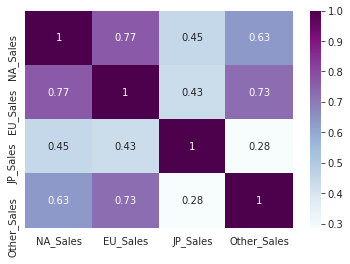

In [ ]:
sns.heatmap(data = df_refined[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].corr(), annot = True, cmap='BuPu');

📌 위 상관계수 Heatmap을 살펴보아도 일본을 제외한 세 지역의 상관계수는 대체로 높은 편이나 일본과 나머지 지역들은 서로 상관도가 낮다는 것을 알 수 있다.

✔️ **Two-sample chi-square test 가설 검정**
* **귀무가설:** 지역에 따라서 선호하는 게임 플랫폼이 다르지 않을 것이다 (각 지역 게임 판매량과 게임 플랫폼은 연관이 없다).
* **대립가설:** 지역에 따라 선호하는 게임 플랫폼이 다를 것이다 (각 지역 게임 판매량과 게임 플랫폼은 연관이 있다).

In [ ]:
df_12 = df_refined.groupby('Platform').sum().reset_index()
df_12_chi = df_12.set_index('Platform').drop(['Year','Total_Sales'], axis=1)
chi_stat, pvalue, dof, ex = chi2_contingency(np.array([df_12_chi]))

print('X2_stat:',chi_stat,', P-value:', pvalue)

X2_stat: 1817.544459149189 , P-value: 0.0


📌 **가설검정 결과:**

p-value가 0.05보다 작은 0에 수렴하는 값이므로 신뢰수준 95%에서 귀무가설을 기각한다.

=>  지역에 따라 선호하는 플랫폼이 다를 것이다 (각 지역 게임 판매량과 플랫폼은 연관이 있다).

## **2) 연도별 게임의 트렌드 분석**

In [ ]:
df_20 = df_refined[['Name','Year']].groupby('Year').count()
df_20

,Name
Year,
1980,9
1981,48
1982,49
1983,18
1984,14
1985,14
1986,21
1987,16
1988,15


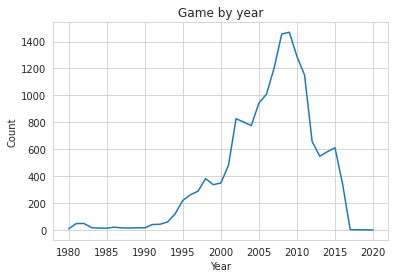

In [ ]:
g20 = sns.lineplot(data = df_20, x = 'Year', y = 'Name')
g20.set_ylabel("Count")
g20.set_title("Game by year");

*출고량이 어느정도 있는 시점(> 200)인 1995년부터 2016년의 데이터만 사용하고자 한다.*

📌 위 그래프에 따르면, 1990년대 후반을 기점으로 출시된 게임의 수가 급격히 증가했으며 2008년과 2009년 경에 가장 많은 게임들이 출시되었다. 2010년대에 들어서는 출시된 게임의 수가 다시 급격히 감소하기 시작했다.

### **2-1) Platform**

In [ ]:
df_21 = df_refined[['Year','Platform','Name']][(df_refined['Year']>=1995) & (df_refined['Year']<2017)].groupby(['Platform','Year']).count().reset_index()
df_21 = df_21.rename(columns = {"Name": "Count"})

In [ ]:
df_21

,Platform,Year,Count
0,3DO,1995,2
1,3DS,2011,118
2,3DS,2012,95
3,3DS,2013,93
4,3DS,2014,79
...,...,...,...
182,XB,2008,1
183,XOne,2013,19
184,XOne,2014,61
185,XOne,2015,78


In [ ]:
df_pivot_21 = df_21.pivot(index='Year', columns='Platform', values='Count').fillna(0)

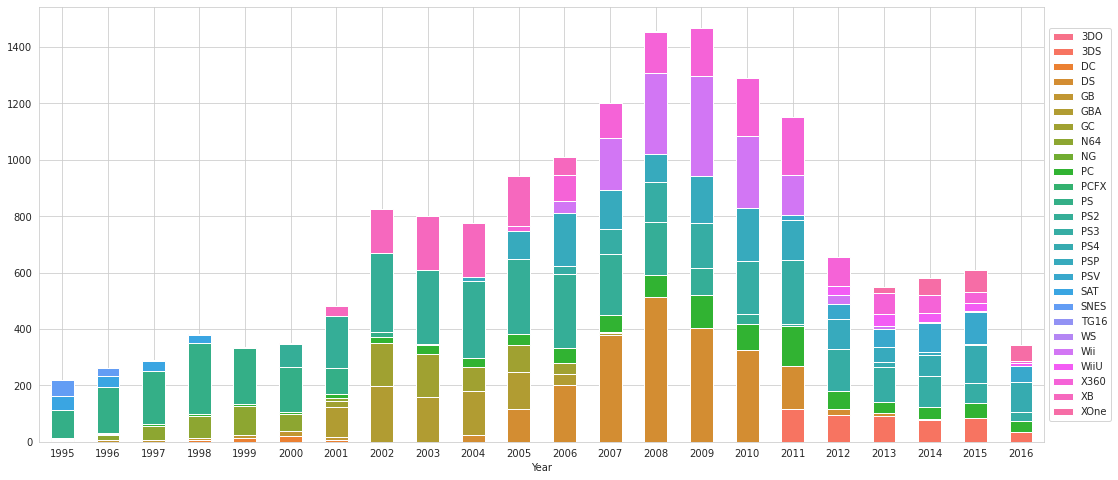

In [ ]:
g21 = df_pivot_21.plot.bar(stacked=True, figsize=(18,8), rot=0, color=sns.color_palette("husl",26))
g21.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [ ]:
px.bar(df_21, x="Year", y="Count", color="Platform")

* **1995~2000:** PS > N64
* **2000~2005:** PS2 > XB > GBA
* **2005~2010:** DS > Wii > X360 > PSP
* **2010~:** PS3/PS4/PSV > 3DS

📌 위 Column Chart를 보면 시대별로 주로 사용되는 게임 플랫폼이 지속적으로 변화한다는 것을 알 수 있다.

✔️ **Two-sample chi-square test 가설 검정**

* **귀무가설:** 연도별로 출시하는 게임 플랫폼이 다르지 않을 것이다 (출시년도와 게임 플랫폼은 연관이 없다).
* **대립가설:** 연도별로 출시하는 게임 플랫폼이 다를 것이다 (출시년도와 게임 플랫폼은 연관이 있다).

In [ ]:
chi_stat, pvalue, dof, ex = chi2_contingency(np.array([df_pivot_21]))

print('X2_stat:',chi_stat,', P-value:', pvalue)

X2_stat: 42031.341022563734 , P-value: 0.0


📌 **가설검정 결과:**

p-value가 0.05보다 작은 0에 수렴하는 값이므로 신뢰수준 95%에서 귀무가설을 기각한다.

=> 연도별로 출시하는 게임 플랫폼이 다를 것이다 (출시년도와 게임 플랫폼은 연관이 있다).

### **2-2) Genre**

In [ ]:
df_22 = df_refined[['Year','Genre','Name']][(df_refined['Year']>=1995) & (df_refined['Year']<2017)].groupby(['Genre','Year']).count().reset_index()
df_22 = df_22.rename(columns = {"Name": "Count"})

In [ ]:
df_pivot_22 = df_22.pivot(index='Year', columns='Genre', values='Count').fillna(0)

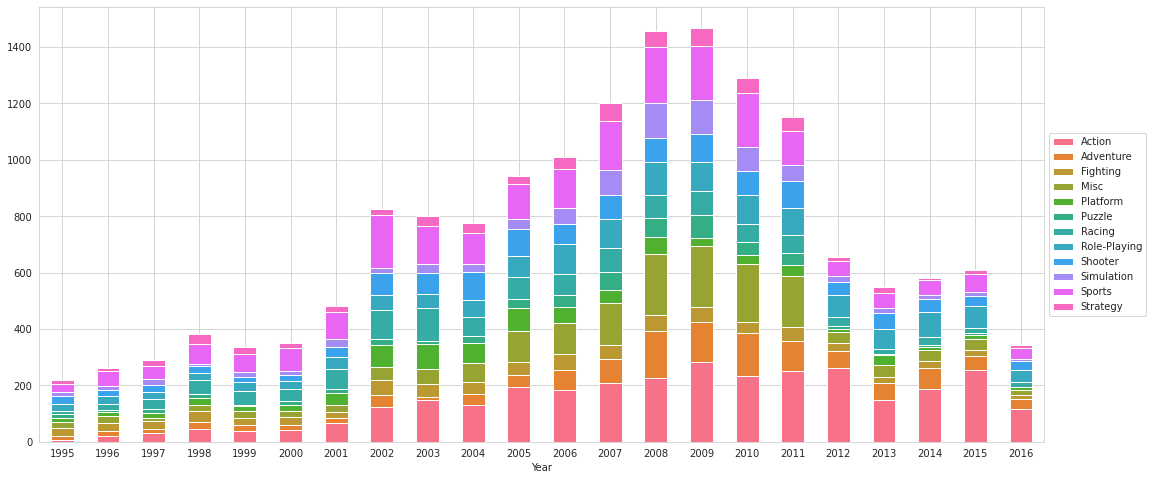

In [ ]:
g22 = df_pivot_22.plot.bar(stacked=True, figsize=(18,8), rot=0, color=sns.color_palette("husl",12))
g22.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [ ]:
px.bar(df_22, x="Year", y="Count", color="Genre")

* **1995~2000:** Sports > Action > Racing
* **2000~2005:** Action > Sports > Racing > Shooter
* **2005~2010:** Action > Misc > Adventure > Sports
* **2010~:** Action > Adventure > Role Playing > Sports

📌 위 Column Chart에 따르면 Action 장르의 게임은 1995년 이후로 꾸준히 많이 출시되는 반면 Sports 장르의 게임은 2010년 이후 초반에 비해 출고량이 급격히 감소했다. 2000~2010년대에는 1900년대에 비해 Adventure와 RPG 장르의 게임들이 많이 출고되었다.

✔️ **Two-sample chi-square test 가설 검정**

* **귀무가설:** 연도별로 출시하는 게임 장르가 다르지 않을 것이다 (출시년도와 게임 장르는 연관이 없다).
* **대립가설:** 연도별로 출시하는 게임 장르가 다를 것이다 (출시년도와 게임 장르는 연관이 있다).

In [ ]:
chi_stat, pvalue, dof, ex = chi2_contingency(np.array([df_pivot_22]))

print('X2_stat:',chi_stat,', P-value:', pvalue)

X2_stat: 2224.6062795220055 , P-value: 0.0


📌 **가설검정 결과:**

p-value가 0.05보다 작은 0에 수렴하는 값이므로 신뢰수준 95%에서 귀무가설을 기각한다.

=> 연도별로 선호하는 게임 장르가 다를 것이다 (출시년도와 게임 장르는 연관이 있다).

### **2-3) 나라별 Sales**

In [ ]:
df_23 = df_refined[(df_refined['Year']>=1995) & (df_refined['Year']<2017)].groupby(['Year']).sum()
df_23 = df_23.drop('Total_Sales',axis=1)
#df_23.set_index('Year')
df_23

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year,,,,
1995,25.50,15.21,45.75,2.68
1996,86.53,47.10,57.44,7.66
1997,94.75,48.32,48.87,9.13
1998,128.80,67.20,49.92,11.14
1999,125.49,62.24,51.65,9.92
2000,94.42,52.73,43.06,11.66
2001,172.86,94.36,38.77,22.62
2002,215.56,109.50,41.89,27.25
2003,197.82,105.41,34.41,26.37


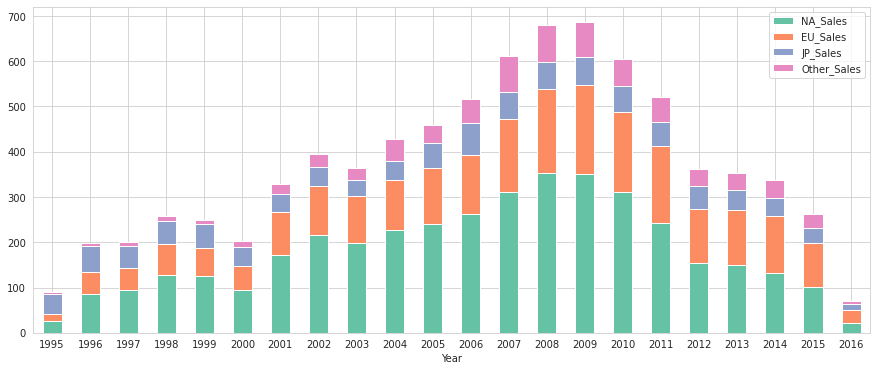

In [ ]:
g23 = df_23.plot.bar(stacked=True, figsize=(15,6), rot=0, color=sns.color_palette("Set2"))

📌 시기와 상관없이 북미 지역이 네 개의 지역 중 가장 많은 연도별 출고량을 기록하고 있다. (평균적으로 **NA > EU > JP > Other** 순으로 연도별 Sales가 높다.)

## **3) 출고량이 높은 게임에 대한 분석 및 시각화 프로세스**

네개의 지역 Sales를 합친 값(Total Sales)을 기준으로 출고량이 높은 50개의 게임을 선정했다.

In [ ]:
top_50 = df_refined.nlargest(50,'Total_Sales').reset_index()
top_50

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,1203,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,3014,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
9,10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


*최근 선호도가 높은 게임들의 트렌드도 살펴보기 위해 2010년도 이후 데이터를 따로 추출하였다.*

In [ ]:
top_50_recent = df_refined[df_refined['Year']>=2010].nlargest(50,'Total_Sales').reset_index()
top_50_recent

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,4343,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
1,3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
2,10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,10621,Pokemon Black/Pokemon White,DS,2010,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
4,2809,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
5,6248,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
6,9070,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
7,4240,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
8,6393,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.74
9,14120,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.47


### **3-0) Name**

In [ ]:
# 게임 이름 중 겹치는 시리즈가 게임 이름 중 겹치는 시리즈가 있는지 체크하기 위해 unique value를 count해보았다.

def returnseries(s):
  if ":" in s:
    return s.split(':')[0]
  else:
    return s.split(' ')[0]

seriesfw = np.array(top_50_recent['Name'].apply(returnseries))

df_30 = pd.DataFrame(data = seriesfw, columns=['Series First Word'])
df_30 = df_30.reset_index().groupby('Series First Word').count()
df_30 = df_30.sort_values(by='index', ascending=False).rename(columns={'index':'Count'}).reset_index()

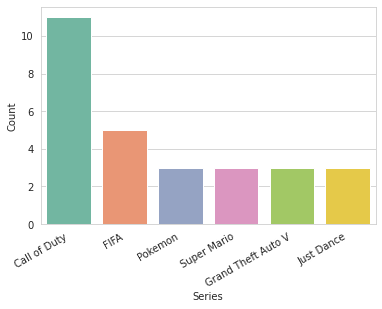

In [ ]:
df_30 = df_30.replace("Super","Super Mario").replace("Grand","Grand Theft Auto V").replace("Just","Just Dance").rename(columns={'Series First Word':'Series'})
df_30 = df_30.nlargest(6,'Count')
df_30

sns.barplot(data=df_30, x='Series', y='Count', palette = "Set2");
plt.xticks(rotation=30, horizontalalignment='right');

📌 2010년대 이후에는 시리즈물로 출시된 게임들(Call of Duty, FIFA, Pokemon 등)이 높은 출고량을 보였다.

### **3-1) Platform**

In [ ]:
df_31 = top_50[['Platform','Name']].groupby('Platform').count().rename(columns = {"Name": "Count"}).reset_index()
df_311 = top_50_recent[['Platform','Name']].groupby('Platform').count().rename(columns = {"Name": "Count"}).reset_index()

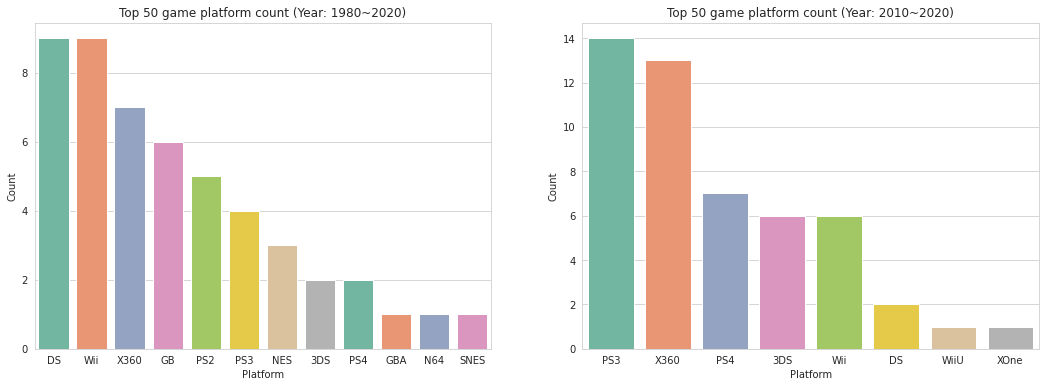

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.barplot(ax=axes[0],data=df_31, x='Platform', y='Count', order=df_31.sort_values('Count',ascending=False).Platform, palette = "Set2"); # 데이터 전체
sns.barplot(ax=axes[1],data=df_311, x='Platform', y='Count', order=df_311.sort_values('Count',ascending=False).Platform, palette = "Set2"); # 2010년도 이후 출시된 게임 데이터
axes[0].set_title('Top 50 game platform count (Year: 1980~2020)')
axes[1].set_title('Top 50 game platform count (Year: 2010~2020)');

**출고량 Top 50 게임들의 플랫폼**
* **전체 데이터 (1980~2020):** DS > Wii > X360 
* **최근 데이터 (2010~2020):** PS3 > X360 > PS4

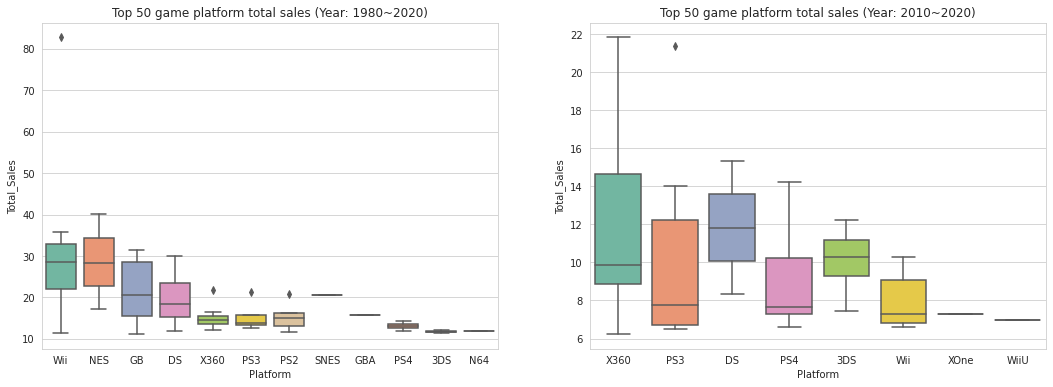

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.boxplot(ax=axes[0], data=top_50, x='Platform', y='Total_Sales', palette = "Set2") # 데이터 전체
sns.boxplot(ax=axes[1], data=top_50_recent, x='Platform', y='Total_Sales', palette = "Set2") # 2010년도 이후 출시된 게임 데이터
#sns.scatterplot(ax=axes[0],data = top_50, x='Platform', y='Total_Sales', hue='Name', legend=False); # 데이터 전체
#sns.scatterplot(ax=axes[1],data = top_50_recent, x='Platform', y='Total_Sales', hue='Name', legend=False); # 2010년도 이후 출시된 게임 데이터
axes[0].set_title('Top 50 game platform total sales (Year: 1980~2020)')
axes[1].set_title('Top 50 game platform total sales (Year: 2010~2020)');

**출고량 Top 50 게임들의 플랫폼별 Sales**
* **전체 데이터 (1980~2020):** Wii > NES > GB (median)
* **최근 데이터 (2010~2020):** DS > 3DS > X360 (median) - Top 50에서 DS/3DS를 사용하는 게임들의 수 자체가 많이 없어 median이 높게 측정되었다.

### **3-2) Genre**

In [ ]:
df_32 = top_50[['Genre','Name']].groupby('Genre').count().rename(columns = {"Name": "Count"}).reset_index()
df_321 = top_50_recent[['Genre','Name']].groupby('Genre').count().rename(columns = {"Name": "Count"}).reset_index()

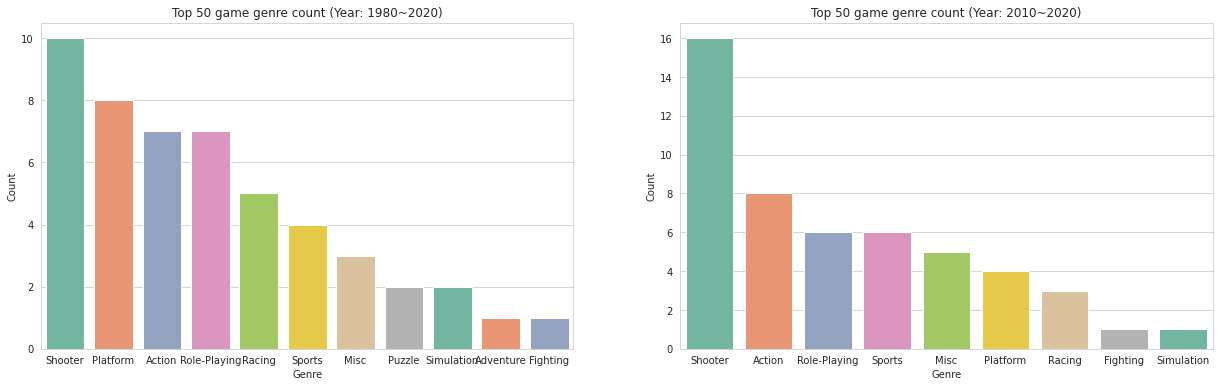

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(21,6))
sns.barplot(ax=axes[0],data=df_32, x='Genre', y='Count', order=df_32.sort_values('Count',ascending=False).Genre, palette = "Set2"); # 데이터 전체
sns.barplot(ax=axes[1],data=df_321, x='Genre', y='Count', order=df_321.sort_values('Count',ascending=False).Genre, palette = "Set2"); # 2010년도 이후 출시된 게임 데이터
axes[0].set_title('Top 50 game genre count (Year: 1980~2020)')
axes[1].set_title('Top 50 game genre count (Year: 2010~2020)');

**출고량 Top 50 게임들의 장르**
* **전체 데이터 (1980~2020):** Shooter > Platform > Action > RPG
* **최근 데이터 (2010~2020):** Shooter > Action > RPG > Sports

(시리즈물로 출시된 Call of Duty 게임 데이터의 영향으로 Shooter 값이 높게 나옴)

In [ ]:
df_322 = top_50[['Genre','Total_Sales']].groupby('Genre').mean().reset_index().sort_values(by='Total_Sales')

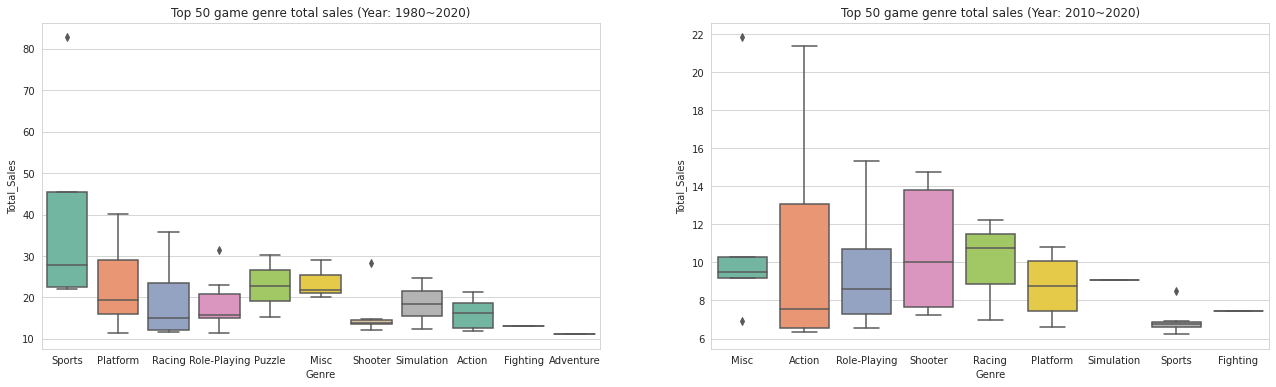

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(22,6))
sns.boxplot(ax=axes[0], data=top_50, x='Genre', y='Total_Sales', palette = "Set2") # 데이터 전체
sns.boxplot(ax=axes[1], data=top_50_recent, x='Genre', y='Total_Sales', palette = "Set2") # 2010년도 이후 출시된 게임 데이터
#sns.scatterplot(ax=axes[0], data = top_50, x='Genre', y='Total_Sales', hue='Name', legend=False)
#sns.scatterplot(ax=axes[1], data = top_50_recent, x='Genre', y='Total_Sales', hue='Name', legend=False)
axes[0].set_title('Top 50 game genre total sales (Year: 1980~2020)')
axes[1].set_title('Top 50 game genre total sales (Year: 2010~2020)');

**출고량 Top 50 게임들의 장르별 Sales**

* **전체 데이터 (1980~2020)**: Sports > Puzzle > Misc (median)
* **최근 데이터 (2010~2020)**: Racing > Shooter > Platform/Role-Playing (median)

### **3-3) Publisher**

In [ ]:
df_33 = top_50[['Publisher','Name']].groupby('Publisher').count().rename(columns = {"Name": "Count"}).reset_index()
df_331 = top_50_recent[['Publisher','Name']].groupby('Publisher').count().rename(columns = {"Name": "Count"}).reset_index()

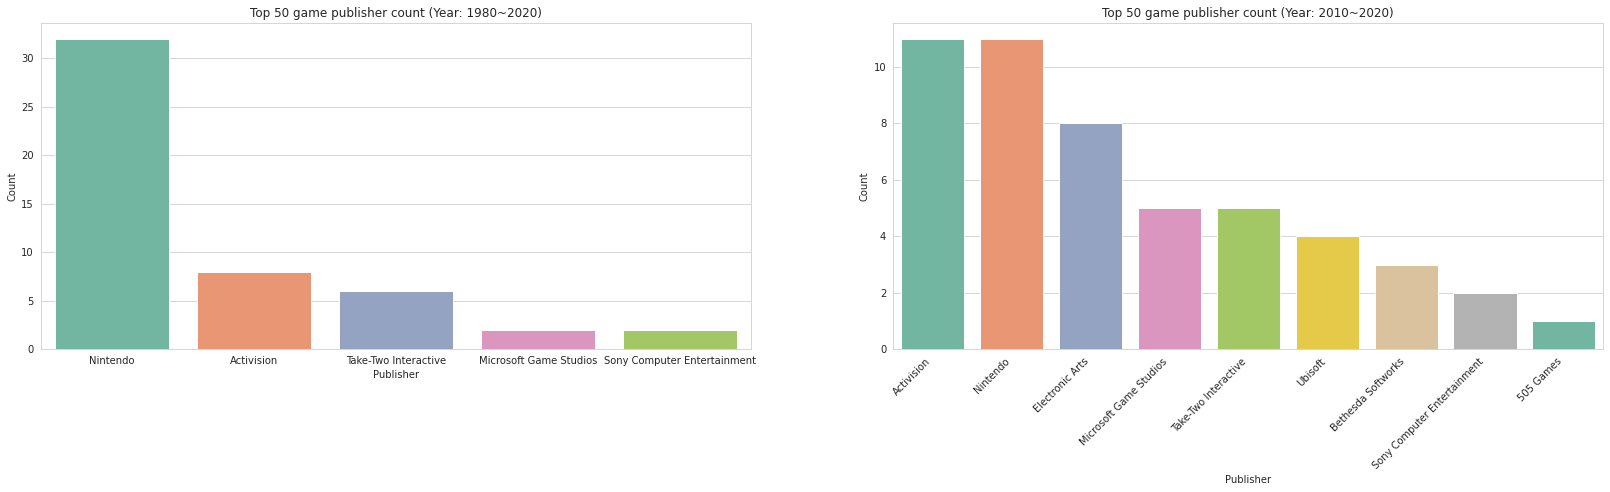

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(28,6))

sns.barplot(ax=axes[0], data=df_33, x='Publisher', y='Count', order=df_33.sort_values('Count',ascending=False).Publisher, palette = "Set2") # 데이터 전체
sns.barplot(ax=axes[1], data=df_331, x='Publisher', y='Count', order=df_331.sort_values('Count',ascending=False).Publisher, palette = "Set2") # 2010년도 이후 출시된 게임 데이터

axes[0].set_title('Top 50 game publisher count (Year: 1980~2020)')
axes[1].set_title('Top 50 game publisher count (Year: 2010~2020)');
plt.xticks(rotation=45, horizontalalignment='right');

**출고량 Top 50 게임들의 Publisher**
* **전체 데이터 (1980~2020):** Nintendo의 압승
* **최근 데이터 (2010~2020):** Activision = Nintendo > Electronic Arts

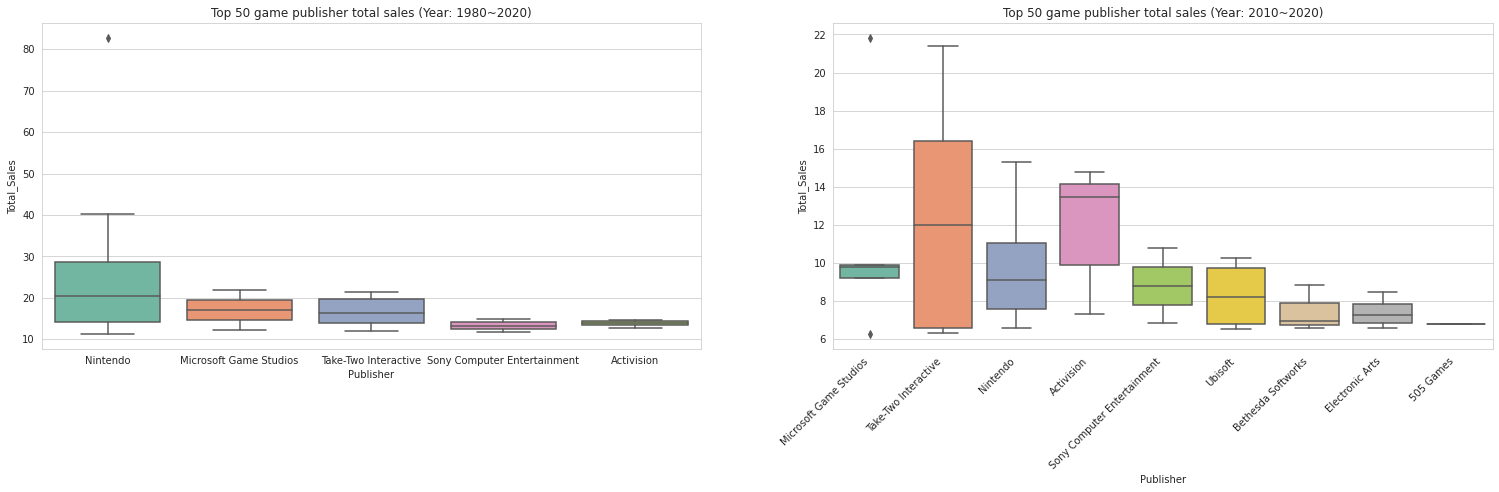

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(26,6))

sns.boxplot(ax=axes[0], data=top_50, x='Publisher', y='Total_Sales', palette = "Set2") # 데이터 전체
sns.boxplot(ax=axes[1], data=top_50_recent, x='Publisher', y='Total_Sales', palette = "Set2") # 2010년도 이후 출시된 게임 데이터
#sns.scatterplot(ax=axes[0], data = top_50, x='Publisher', y='Total_Sales', hue='Name', legend=False) # 데이터 전체
#sns.scatterplot(ax=axes[1], data = top_50_recent, x='Publisher', y='Total_Sales', hue='Name', legend=False); # 2010년도 이후 출시된 게임 데이터

axes[0].set_title('Top 50 game publisher total sales (Year: 1980~2020)')
axes[1].set_title('Top 50 game publisher total sales (Year: 2010~2020)');
plt.xticks(rotation=45, horizontalalignment='right');

**출고량 Top 50 게임들의 Publisher별 Sales**

* **전체 데이터 (1980~2020)**: Nintendo > Microsoft > Take-Two (median)
* **최근 데이터 (2010~2020)**: Activision > Take-Two > Nintendo (median)

### **3-4) Platform, Genre 조합 (2010년도 이후 데이터만 포함)**

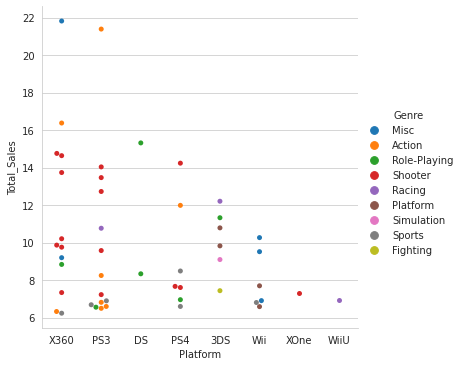

In [ ]:
sns.catplot(x="Platform", y="Total_Sales", hue="Genre", kind="swarm", data=top_50_recent); # Outlier 2개

몇몇 outlier를 제외하고는 대부분 Platform에서 가장 높은 출고량을 기록한 장르는 Shooter라는 것을 알 수 있다.

# **3. 결론**

위 데이터 분석 결과를 종합해봤을 때 **다음 분기에 개발하면 좋을 게임**은:

* 연속성이 있는 게임시리즈
* 가장 많은 출고량을 기록한 북미와 유럽 타겟
* 상위 50개의 게임들의 상위 50개의 게임들의 주류를 이루는 PS3와 PS4 플랫폼 이용
* Shooter 장르 출시